# An Attempt to Predict Stock Market Prices

### **Data Description:** 

In this mission, we'll be working with a csv file containing index prices. Each row in the file contains a **daily record of the price of the S&P500 Index from 1950 to 2015**. The dataset is stored in sphist.csv.

The columns of the dataset are:

    Date -- The date of the record.
    Open -- The opening price of the day (when trading starts).
    High -- The highest trade price during the day.
    Low -- The lowest trade price during the day.
    Close -- The closing price for the day (when trading is finished).
    Volume -- The number of shares traded.
    Adj Close -- The daily closing price, adjusted for corporate actions.

**We'll be using this dataset to develop a predictive model. We'll train the model with data from 1950-2012, and try to make predictions from 2013-2015.**

In [36]:
# To calculate Linear Regression, do plotting and calculate error

# Importing necessary modules
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Importing the statistics module
from statistics import mean
from statistics import median

def linearReg(x_train, y_train, x_test, y_test):
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices: $Y_i$")
    plt.ylabel("Predicted Prices: $\hat{Y}_i$")
    plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

    # Calculating the error
    delta_y = y_test - y_pred;
    print("Mean Absolute Error (MAE) = " + str(mean(abs(delta_y))))

    # Calculating the percentage error
    delta_y_percentage = (y_test - y_pred)/ y_test;

    print(bold + "Median Absolute Percentage Error (MAPE) = " + 
              str(round(median(abs(delta_y_percentage)), 2)*100) + "%" + end)

In [37]:
# To split the data into train and split based on date.

from sklearn.preprocessing import StandardScaler

def trainTestSplit(sp_augmented, predictWeek = False):
    
    # Train dataset would contain rows with a date less than 2013-01-01
    train = sp_augmented[sp_augmented["Date"] < datetime(year=2013, month=1, day=1)]
    test = sp_augmented[sp_augmented["Date"] >= datetime(year=2013, month=1, day=1)]

    
    # Separate Train dataset & remove unusable columns for prediction
    # if % change in a week is to be predicted, then response variable 
    # should be set to percentage change in closing price over a week.
    if predictWeek:
        y_train = train['closePerChange']
        x_train = train.drop(
            ['closePerChange', 'Close', 'High', 'Low', 
             'Open', 'Volume', 'Adj Close', 'Date'], axis=1)
    else:
        y_train = train['Close']
        x_train = train.drop(
            ['Close', 'High', 'Low', 'Open', 
             'Volume', 'Adj Close', 'Date'], axis=1)

    # Separate Test dataset & remove unusable columns for prediction
    if predictWeek:
        y_test = test['closePerChange']
        x_test = test.drop(
            ['closePerChange', 'Close', 'High', 'Low', 
             'Open', 'Volume', 'Adj Close', 'Date'], axis=1)
    else:
        y_test = test['Close']
        x_test = test.drop(
            ['Close', 'High', 'Low', 'Open', 
             'Volume', 'Adj Close', 'Date'], axis=1)

#     # Standardisation.
#     scaler = StandardScaler(copy=False).fit(x_train)
#     x_train = scaler.transform(x_train)
    
#     scaler = StandardScaler(copy=False)
#     y_train = np.squeeze(scaler.fit_transform(y_train.reshape(-1, 1)))

#     scaler = StandardScaler(copy=False).fit(x_test)
#     x_test = scaler.transform(x_test)
    
#     scaler = StandardScaler(copy=False)
#     y_test = np.squeeze(scaler.fit_transform(y_test.reshape(-1, 1)))

    print("\n\n*** Train Dataset Outcome Variables ***")
    print(y_train.head(5))
    print("\n\n*** Train Dataset Input Variables ***")
    print(x_train.head(5))
    print("\n\n*** Test Dataset Outcome Variables ***")
    print(y_test.head(5))
    print("\n\n*** Test Dataset Input Variables ***")
    print(x_test.head(5))
    
    return x_train, y_train, x_test, y_test


# Loading the Data

In [38]:
# To load the input data
import pandas as pd
import numpy as np
from datetime import datetime

# used to format headings 
bold = '\033[1m'
end = '\033[0m'

# Read the s&p 500 input data set and sorting based on date.
sp500 = pd.read_csv("sphist.csv", index_col=False)
sp500["Date"] = pd.to_datetime(sp500["Date"])
sp_sorted = sp500.sort_values("Date")

print(sp_sorted.head(3))
# print(sp_sorted.tail(3))

            Date   Open   High    Low  Close     Volume  Adj Close
16589 1950-01-03  16.66  16.66  16.66  16.66  1260000.0      16.66
16588 1950-01-04  16.85  16.85  16.85  16.85  1890000.0      16.85
16587 1950-01-05  16.93  16.93  16.93  16.93  2550000.0      16.93


From the sorted data, we can see that data since Jan 1950 is there in the input dataset.

# Prediction of Stock Prices: Week Ahead

To predict % change in stock price after a week, we can use features averaging previous 'n' days coupled with % change in stock price after a week, as the response variable, y as training data. In test data also, a 7-day forward shift in the closing price is introduced to compare the % change against prediction.



*** Dataset After Augmented Values ***
            Date       Open       High        Low      Close     Volume  \
16559 1950-02-15  17.059999  17.059999  17.059999  17.059999  1730000.0   
16558 1950-02-16  16.990000  16.990000  16.990000  16.990000  1920000.0   
16557 1950-02-17  17.150000  17.150000  17.150000  17.150000  1940000.0   
16556 1950-02-20  17.200001  17.200001  17.200001  17.200001  1420000.0   
16555 1950-02-21  17.170000  17.170000  17.170000  17.170000  1260000.0   
16554 1950-02-23  17.209999  17.209999  17.209999  17.209999  1310000.0   
16553 1950-02-24  17.280001  17.280001  17.280001  17.280001  1710000.0   
16552 1950-02-27  17.280001  17.280001  17.280001  17.280001  1410000.0   
16551 1950-02-28  17.219999  17.219999  17.219999  17.219999  1310000.0   
16550 1950-03-01  17.240000  17.240000  17.240000  17.240000  1410000.0   

       Adj Close  closePerChange  mean_7by30  std_7by30  mean_7by14  std_7by14  
16559  17.059999        1.289578    1.015091   0.430

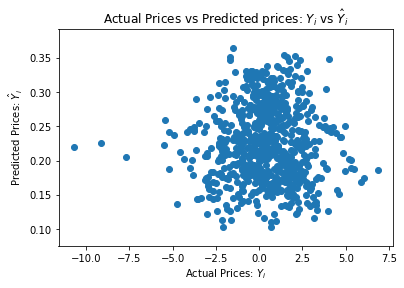

Mean Absolute Error (MAE) = 1.4680642947173421
Median Absolute Percentage Error (MAPE) = 93.0%


In [39]:

# Taking a copy of sorted data so that 
# it can be used for other predictions
sortedData = pd.DataFrame(sp_sorted)

# closePrices.shift(-7) would give the closing price after a week.
closePrices = pd.DataFrame(sortedData.Close)
shiftedByWeek = closePrices.shift(-7)

# to find the % change in closing price after a week
closePriceChange = 100 * (shiftedByWeek - closePrices)/closePrices 
sortedData['closePerChange'] = closePriceChange

# The average price for the past 7 days.
# The standard deviation of the price over the past 7 days
shifted = closePrices.shift(1)
window = shifted.rolling(window=7)
means_7 = window.mean()
std_7 = window.std()
# sp_augmented['mean_7'] = means_7
# sp_augmented['std_7'] = std_7

window = shifted.rolling(window=30)
means_30 = window.mean()
std_30 = window.std()
sortedData['mean_7by30'] = means_7/ means_30
sortedData['std_7by30'] = std_7/ std_30

# The ratio between the average price 
# for the past 7 days, and the average 
# price for the past 14 days.
window = shifted.rolling(window=14)
means_14 = window.mean()
std_14 = window.std()
sortedData['mean_7by14'] = means_7/ means_14
sortedData['std_7by14'] = std_7/ std_14


# Some of the indicators use 30 days of historical data, and the dataset starts 
# on 1950-01-03. Thus, any rows that fall before 1950-02-04 don't have enough 
# historical data to compute all the indicators. 
sp_augmented = sortedData[sortedData["Date"] > datetime(year=1950, month=2, day=4)]

# Use the dropna method to remove any rows with NaN values. 
# Pass in the axis=0 argument to drop rows.
sp_augmented = sp_augmented.dropna(axis = 0)

print("\n\n*** Dataset After Augmented Values ***")
print(sp_augmented.head(10))

# To split into train and test data to do linear regression
x_train, y_train, x_test, y_test = trainTestSplit(sp_augmented, predictWeek = True)
linearReg(x_train, y_train, x_test, y_test)

# MAE vs MAPE Error Metric

MAE error metric is not interpretable, since the value of MAE can range from 0 to infinity. We can't understand how good the model performed. Hence it would be better to compute Percentage error and even better would be to compute median (instead of mean) so that the perturbation caused by outliers could be eliminated.

Median Absolute Percentage Error (MAPE) would be a far more intrepretable metric, resilient to outliers.

# Prediction of Stock Prices: Day Ahead

Percentage error for weekly prediction is unacceptably high. This was expected as stock prediction is an extremely hard problem, to get even a better than random model. 

Lets try to predict % change in stock price prior to a day. We can use features, mean and standard deviation of previous 365 days & The ratio between the average price for the past 5 days, and the average price for the past 365 days. The response variable, y, would be the closing price. A 1-day forward shift in the closing price, so that the closing price of the present day (future data) shouldn't be included in prediction.



*** Dataset After Augmented Values ***
            Date       Open       High        Low      Close     Volume  \
16224 1951-06-19  22.020000  22.020000  22.020000  22.020000  1100000.0   
16223 1951-06-20  21.910000  21.910000  21.910000  21.910000  1120000.0   
16222 1951-06-21  21.780001  21.780001  21.780001  21.780001  1100000.0   
16221 1951-06-22  21.549999  21.549999  21.549999  21.549999  1340000.0   
16220 1951-06-25  21.290001  21.290001  21.290001  21.290001  2440000.0   

       Adj Close  closePerChange  mean_7by30  std_7by30  mean_7by14  \
16224  22.020000       -4.178020    1.001163   0.516555    1.007085   
16223  21.910000       -4.335924    1.005594   0.540823    1.008357   
16222  21.780001       -3.122135    1.008656   0.550248    1.009039   
16221  21.549999       -1.484914    1.011709   0.489668    1.009755   
16220  21.290001        1.643955    1.013208   0.548262    1.008725   

       std_7by14   mean_365   std_365  mean_5by365  
16224   1.006277  19.447726 

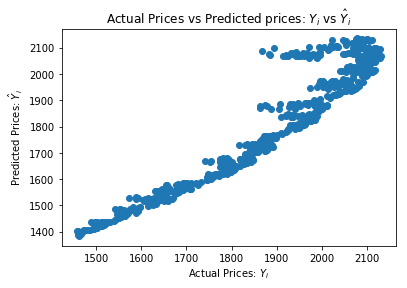

Mean Absolute Error (MAE) = 99.43097824659425
Median Absolute Percentage Error (MAPE) = 6.0%


In [40]:


# Taking a copy of sorted data so that 
# it can be used for other predictions
sortedData = pd.DataFrame(sp_sorted)

# To do feature engineering - take mean of previous rows
closePrices = pd.DataFrame(sortedData.Close)

# Need to shift by 1 coz otherwise it will add up present value also
# Adding present value to the mean is same as giving the 
# predicted value (outcome)along with the training data.
# This will hurt prediction model
shifted = closePrices.shift(1)

# The average price for the past 365 days.
# The standard deviation of the price over the past 365 days
window = shifted.rolling(window=365)
means_365 = window.mean()
std_365 = window.std()
sortedData['mean_365'] = means_365
sortedData['std_365'] = std_365

# The ratio between the average price 
# for the past 5 days, and the average 
# price for the past 365 days.
window = shifted.rolling(window=5)
means_5 = window.mean()
sortedData['mean_5by365'] = means_5/ means_365

# Some of the indicators use 365 days of historical data, and the dataset starts 
# on 1950-01-03. Thus, any rows that fall before 1951-01-03 don't have enough 
# historical data to compute all the indicators. 
sp_augmented = sortedData[sortedData["Date"] > datetime(year=1951, month=1, day=2)]

# Use the dropna method to remove any rows with NaN values. 
# Pass in the axis=0 argument to drop rows.
sp_augmented = sp_augmented.dropna(axis = 0)

print("\n\n*** Dataset After Augmented Values ***")
print(sp_augmented.head(5))

# To split into train and test data to do linear regression
x_train, y_train, x_test, y_test = trainTestSplit(sp_augmented, predictWeek = False)
linearReg(x_train, y_train, x_test, y_test)

MAPE of 6.0% is a much better prediction result than the previous weekly prediction attempt.

# Conclusion

1) **In daily forecast, Actual and Predicted prices are almost linear. Hence the daily prediction model is working fine**, though the error can be further reduced with a better model such as randomforest or using feature engineering techniques such as previous volume, highest/ lowest price in the past year etc.

2) For a financial company, another way to reframe this problem would be **to perceive the problem as a classification problem, instead of regression problem.** If we can predict, whether the price of a particular stock would go up or down, on next day or a period of time then such a system is very useful.

3) There was a Kaggle competition on similar lines and all of the good solutions just predicted 0% change in price most of the times.

# Potential Improvements

a) Learn the domain more and engineer very domain specific features. 

b) Implement this paper for a Deep Learning  based momentum trading strategy: Applying Deep Learning To Enhance Momentum Trading Strategies In Stocks by Lawrence Takeuchi & Yu-Ying (Albert) Lee (publicly available at http://cs229.stanford.edu)